# 4장. 데이터 표현과 특성 공학

*아래 링크를 통해 이 노트북을 주피터 노트북 뷰어(nbviewer.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.org/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/04-representing-data-feature-engineering.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/intro_ml_with_python_2nd_revised/blob/main/04-representing-data-feature-engineering.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

In [1]:
%pip install koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 0, '날짜')

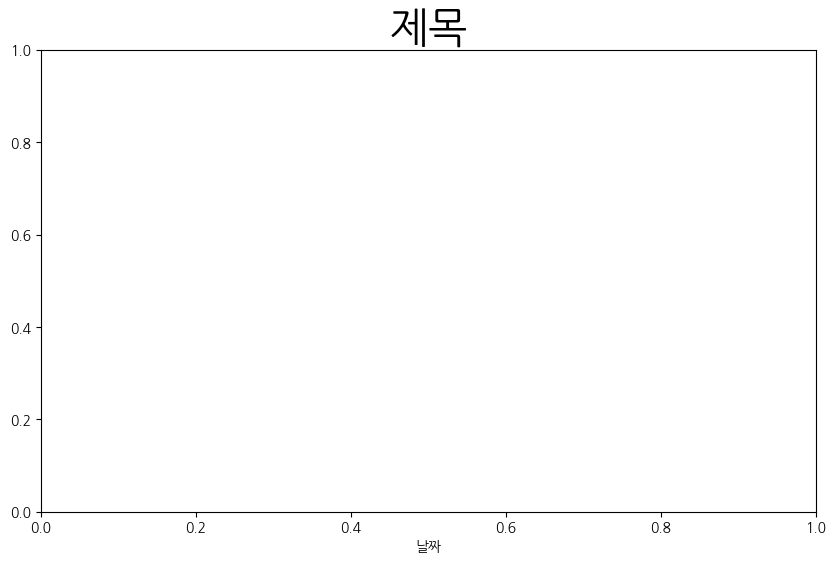

In [2]:
%matplotlib inline
import preamble
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

plt.figure(figsize=(10,6))
plt.title('제목', fontsize=30)
plt.xlabel('날짜', fontsize=10)


이 노트북은 맷플롯립 그래프에 한글을 쓰기 위해 나눔 폰트를 사용합니다. 코랩의 경우 다음 셀에서 나눔 폰트를 직접 설치합니다.

In [3]:
import sklearn
from preamble import *
import matplotlib



## 4.1 범주형 변수

### 4.1.1 원-핫-인코딩 (가변수)

In [4]:
import pandas as pd

In [5]:
import mglearn
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


#### 문자열로 된 범주형 데이터 확인하기

In [6]:
data.shape

(32561, 7)

In [7]:
print(data.workclass.value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [8]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)###one-hot encoding 수행
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [9]:
data_dummies.head().astype(int)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [10]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving'].astype(int) # 마지막 열을 포함
# NumPy 배열 추출, [0:10] 슬라이싱은 인덱스 10을 포함하지 않는다
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [11]:
features[:5]

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,...,0,0,0,0
1,50,13,0,0,...,0,0,0,0
2,38,40,0,0,...,0,0,0,0
3,53,40,0,0,...,0,0,0,0
4,28,40,0,0,...,0,0,0,0


In [12]:
X[:5]

array([[39, 40,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [50, 13,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [38, 40,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [53, 40,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [28, 40,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


### 4.1.2 숫자로 표현된 범주형 특성

In [14]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [15]:
pd.get_dummies(demo_df).astype(int)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [16]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str) #Pandas의 astype() 메서드는 지정한 데이터 타입으로 데이터를 변환
pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']).astype(int)

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [17]:
demo_df.head()

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [18]:
from sklearn.preprocessing import OneHotEncoder # 모든 열에 인코딩한다
# sparse_output=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse_output=True) ## False로 바꾸어 실행
print(ohe.fit_transform(demo_df))# DataFrame이 아니어서 열 이름이 없다

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (4, 6)>
  Coords	Values
  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0


In [19]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


In [20]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


StandardScaler는 다음 작업을 수행합니다:

데이터의 평균(mean)을 0으로 맞춤
각 열의 값에서 해당 열의 평균을 뺍니다.

z=x−mean
표준편차(standard deviation)를 1로 맞춤
평균을 0으로 만든 값들을 각 열의 표준편차로 나눕니다.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),## 변환 이름, 변환기 객체, 변환이 적용될 열
     ("onehot", OneHotEncoder(sparse_output=False),
      ['workclass', 'education', 'gender', 'occupation'])])

In [22]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 incom을 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape) ##44개의 특성

(24420, 44)


In [24]:
print(X_train_trans[:5])

[[ 1.499 -0.445  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.   ]
 [ 2.38  -1.668  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
   0.     0.     0.     0.   ]
 [ 0.25  -0.037  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     1.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
   0.     0.     0.     0.   ]
 [-0.925 -0.037  0.     0.     0.     0.     1.     0.     0.     0.
   0.     

In [25]:
# Extract column names for numeric and one-hot encoded features
numeric_features = ['age', 'hours-per-week']
onehot_features = ct.named_transformers_['onehot'].get_feature_names_out(['workclass', 'education', 'gender', 'occupation'])

# Combine all feature names
all_features = list(numeric_features) + list(onehot_features)

# Print all feature names
print(all_features)

['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupat

In [26]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [27]:
ct.named_transformers_.onehot

OneHotEncoder(sparse_output=False)

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [28]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer( # 열별로 다른 전처리 단계를 적용하는 변환 파이프라인을 만든다
    (StandardScaler(), ['age', 'hours-per-week']),#평균 0, 편차 1로 표준화 변환
    (OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation']))
# pipeline은 각 열에 대하여 전처리 수행 > 전체 데이터에 대하여 변환 적용

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

Text(0, 0.5, '타깃')

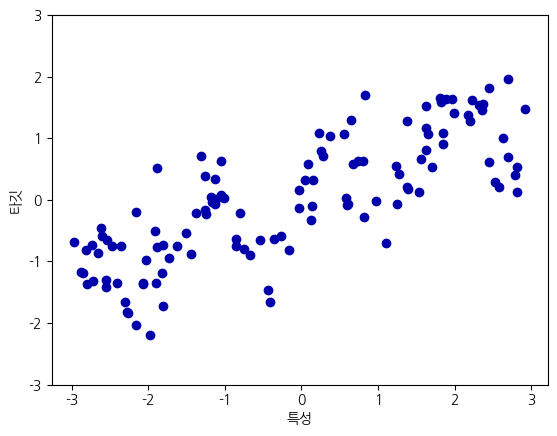

In [29]:
X,y = mglearn.datasets.make_wave(n_samples=120) #from the page 59
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

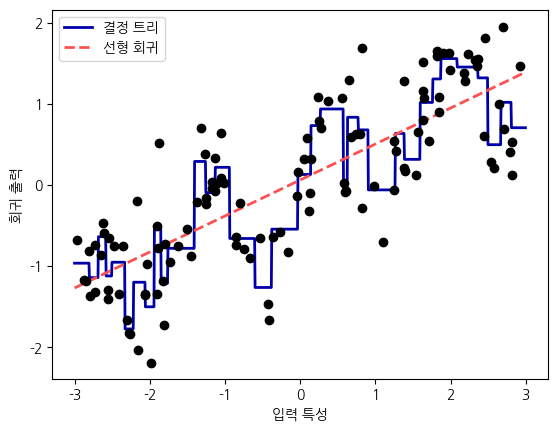

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)#배열을 1열로 변환하고 행의 크기는 자동 계산
##reshape(-1,1) 사용하는 이유: X는 y = wx + b에서 x는 1개의 열로 구성된 행들의 집합
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [31]:
from sklearn.preprocessing import KBinsDiscretizer

In [32]:
print(X)

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]
 [-2.876]
 [ 2.819]
 [ 1.995]
 [-1.726]
 [-1.909]
 [-1.9  ]
 [-1.175]
 [ 0.149]
 [-0.408]
 [-1.253]
 [ 0.671]
 [-2.163]
 [-1.247]
 [-0.802]
 [-0.264]
 [ 1.711]
 [-1.802]
 [ 0.085]
 [ 0.554]
 [-2.721]
 [ 0.645]
 [-1.977]
 [-2.61 ]
 [ 2.693]
 [ 2.794]
 [ 1.85 ]
 [-1.172]
 [-2.414]
 [ 1.105]
 [-0.359]
 [-2.268]
 [-0.029]
 [-2.794]
 [ 2.456]
 [-1.447]
 [ 0.975]
 [-1.13 ]
 [ 0.12 ]
 [ 0.28 ]
 [-1.891]
 [ 2.818]
 [ 1.651]
 [ 2.637]
 [ 2.369]
 [ 0.587]
 [ 2.531]
 [-2.469]
 [-1.824]
 [-2.729]
 [-1.048]
 [-0.668]
 [-1.372]
 [ 1.972]
 [-0.859]
 [-1.314]
 [ 0.256]
 [-2.154]
 [ 1.813]
 [-2.553]
 [ 2.921]
 [ 1.633]
 [-1.808]
 [-2.967]
 [ 1.893]
 [ 1.241]
 [ 1.374]
 [ 1.628]
 [-2.556]
 [-0.849]
 [-2.305]
 [ 2.179]
 [ 0.74 ]
 [-1.015]
 [-2.619]
 [-1.134]
 [-1.049]
 [ 1.378]
 [ 0.825]
 [ 2.323]
 [-0.167]
 [-2.282]
 [ 1.279]
 [ 1.565]
 [ 0.368]
 [ 1.626]
 [-0.037]
 [ 0.136]
 [-0.435]
 [-2.847]
 [-2.353]


In [33]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
         1.744,  2.333,  2.921])                                       ]


구간분할 - 연속형 데이터에 강력한 선형 모델을 만들기 위해 한 가지 방법
하나의 특성을 여러 개의 이산적인 특성으로 나누는 것
선형 모델이 데이터의 비선형성을 잡아낼 수 있다

In [34]:
X_binned = kb.transform(X) # 각 데이터 포인트를 해당 구간으로 인코딩
X_binned

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 120 stored elements and shape (120, 10)>

In [35]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [36]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense') # dense representation: 메모리에 모두 표현, sparse 표현은 1만 표현하는 것을 말함
kb.fit(X)
X_binned = kb.transform(X)

onehot-dense 설정:one-hot encoded 특성을 dense 배열로 표현 > 3개의 구간에 해당하는 3개의 열로 밀집배열 표현

In [37]:
line[:5]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976]])

In [38]:
line_binned = kb.transform(line)
line_binned[:10] # 밀집 배열 형태

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

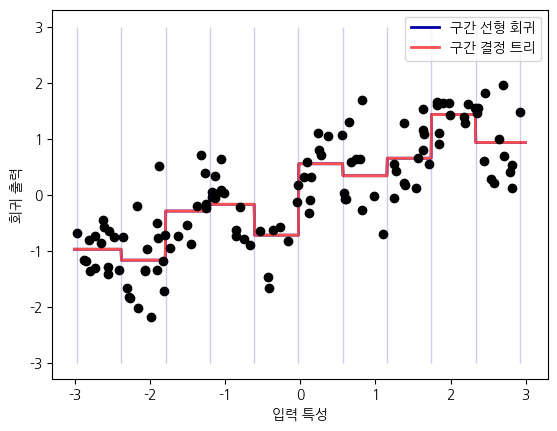

In [39]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y) #원-핫-인코딩된 데이터로 학습
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀') ##line_binned는 테스트 데이터

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) #원-핫-인코딩된 데이터로 학습
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show() # 책에는 없음

## 4.5 상호작용과 다항식

In [40]:
X_combined = np.hstack([X, X_binned])#X는 연속형 특성, X_binned는 구간 분할된 특성
print(X_combined.shape)# 기울기가 추가

(120, 11)


In [41]:
print(X_combined)

[[-0.753  0.     0.    ...  0.     0.     0.   ]
 [ 2.704  0.     0.    ...  0.     0.     1.   ]
 [ 1.392  0.     0.    ...  1.     0.     0.   ]
 ...
 [-1.881  0.     1.    ...  0.     0.     0.   ]
 [ 2.355  0.     0.    ...  0.     0.     1.   ]
 [ 0.236  0.     0.    ...  0.     0.     0.   ]]


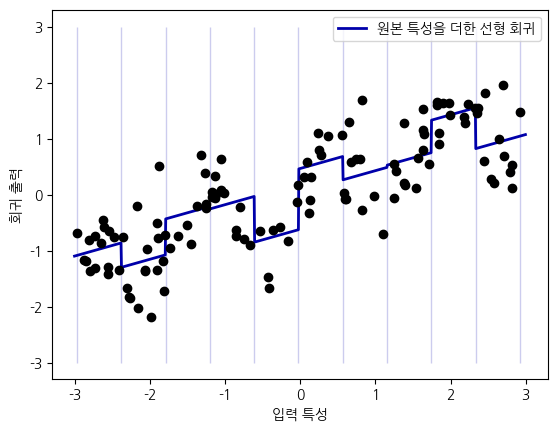

In [42]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show() # 책에는 없음

In [43]:
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
X_product = np.hstack([X_binned, X * X_binned])# 상호작용: X * X_binned
print(X_product.shape)
# 연속형 특성과 이산적인 특성의 곱은 비선형성을 추가
# 모델이 선형적인 관계로는 설명하기 어려운 복잡한 관계를 학습할 수 있다

(120, 20)


In [45]:
print(X_product[:1])#X_binned + X*X_binned

[[ 0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  -0.    -0.    -0.    -0.753 -0.    -0.    -0.    -0.    -0.    -0.   ]]


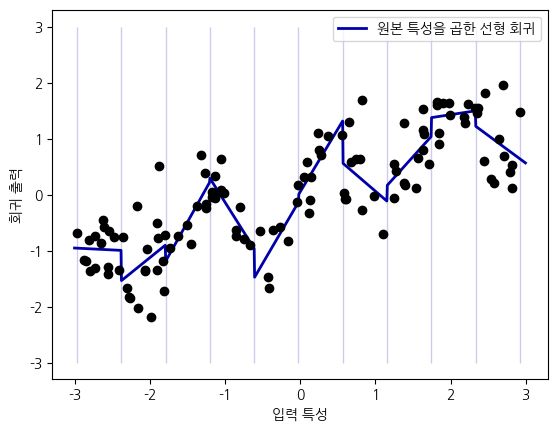

In [46]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [47]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 15까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=15, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [48]:
X_poly[:1]

array([[-0.753,  0.567, -0.427,  0.321, -0.242,  0.182, -0.137,  0.103,
        -0.078,  0.058, -0.044,  0.033, -0.025,  0.019, -0.014]])

In [49]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 15)


In [50]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
 [[     -0.753       0.567      -0.427       0.321      -0.242       0.182
       -0.137       0.103      -0.078       0.058      -0.044       0.033
       -0.025       0.019      -0.014]
 [      2.704       7.313      19.777      53.482     144.632     391.125
     1057.714    2860.36     7735.232   20918.278   56569.004  152978.757
   413698.285 1118758.414 3025442.535]
 [      1.392       1.938       2.697       3.754       5.226       7.274
       10.125      14.094      19.618      27.307      38.011      52.91
       73.648     102.516     142.698]
 [      0.592       0.35        0.207       0.123       0.073       0.043
        0.025       0.015       0.009       0.005       0.003       0.002
        0.001       0.001       0.   ]
 [     -2.064       4.26       -8.791      18.144     -37.448      77.289
     -159.516     329.222    -679.478    1402.367   -2894.328    5973.569
   -12328.779   25445.221  -52516.0

In [51]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10'
 'x0^11' 'x0^12' 'x0^13' 'x0^14' 'x0^15']


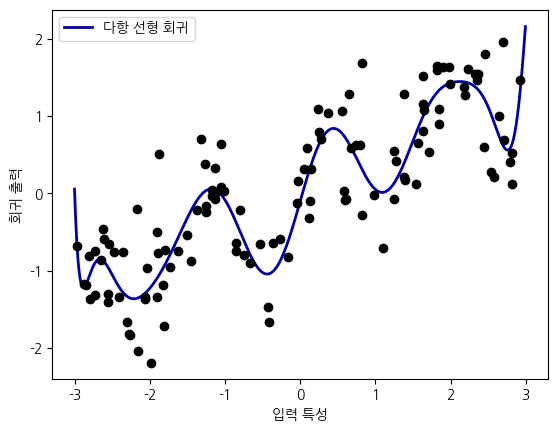

In [52]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

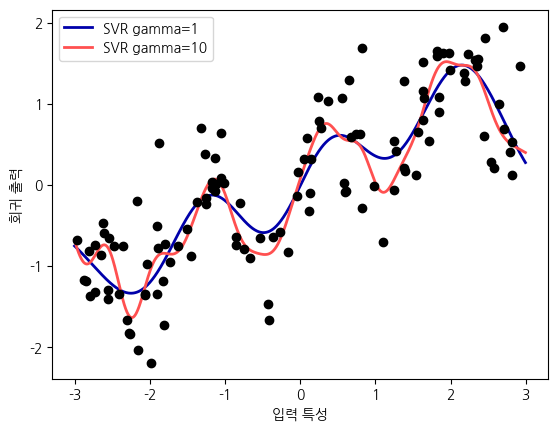

In [53]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show() # 책에는 없음

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 직접 다운로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) #Every second row of the DataFrame (even indices).
##raw_df.values[::2, :]: Every second row of the DataFrame (even indices).
##raw_df.values[1::2, :2]: Every second row starting from the first row, but only the first two columns (odd indices).
target = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
print(raw_df[:5]) #출력을 해보아야 slicing하는 이유를 알 수가 있다 

         0      1      2    3   ...    7    8      9     10
0  6.32e-03  18.00   2.31  0.0  ...  4.09  1.0  296.0  15.3
1  3.97e+02   4.98  24.00  NaN  ...   NaN  NaN    NaN   NaN
2  2.73e-02   0.00   7.07  0.0  ...  4.97  2.0  242.0  17.8
3  3.97e+02   9.14  21.60  NaN  ...   NaN  NaN    NaN   NaN
4  2.73e-02   0.00   7.07  0.0  ...  4.97  2.0  242.0  17.8

[5 rows x 11 columns]


In [56]:
raw_df.values[1::2,:2]
#data

array([[396.9 ,   4.98],
       [396.9 ,   9.14],
       [392.83,   4.03],
       ...,
       [396.9 ,   5.64],
       [393.45,   6.48],
       [396.9 ,   7.88]])

In [57]:
X_train[:5]

array([[  0.191,  22.   ,   5.86 ,   0.   ,   0.431,   5.605,  70.2  ,
          7.955,   7.   , 330.   ,  19.1  , 389.13 ,  18.46 ],
       [  0.103,  25.   ,   5.13 ,   0.   ,   0.453,   5.927,  47.2  ,
          6.932,   8.   , 284.   ,  19.7  , 396.9  ,   9.22 ],
       [  0.105,  40.   ,   6.41 ,   1.   ,   0.447,   7.267,  49.   ,
          4.787,   4.   , 254.   ,  17.6  , 389.25 ,   6.05 ],
       [  8.717,   0.   ,  18.1  ,   0.   ,   0.693,   6.471,  98.8  ,
          1.726,  24.   , 666.   ,  20.2  , 391.98 ,  17.12 ],
       [ 10.834,   0.   ,  18.1  ,   0.   ,   0.679,   6.782,  90.8  ,
          1.819,  24.   , 666.   ,  20.2  ,  21.57 ,  25.79 ]])

In [58]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [59]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
print("다항 특성 이름:\n", poly.get_feature_names_out())

다항 특성 이름:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


In [60]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


## 4.6 일변량 비선형 변환

In [62]:
rnd = np.random.RandomState(0) #난수 생성 객체
X_org = rnd.normal(size=(1000, 3)) # (1000,3) 난수 생성
w = rnd.normal(size=3) # 3개 가중치

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)# [x0,x1,x2] *[w0,w1,w2]= w0*x1+w1*w1+w2*x2
print(X[:20, 0])
print(y[:20])

[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18]
[ 2.926  4.744  1.439  0.57   1.231  1.405  0.305  1.618  2.784  0.405
  0.564 -3.372  2.688 -0.915 -1.551 -1.499 -2.59   0.461  0.191  0.163]


In [63]:
print(X.shape)

(1000, 3)


In [64]:
print(y.shape)

(1000,)


In [65]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


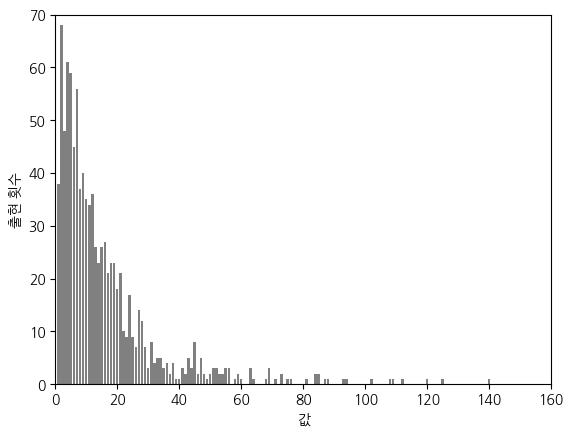

In [66]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

In [67]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


In [68]:
X_train_log = np.log(X_train + 1)# 로그 변환 > 비선형성 변환
X_test_log = np.log(X_test + 1)

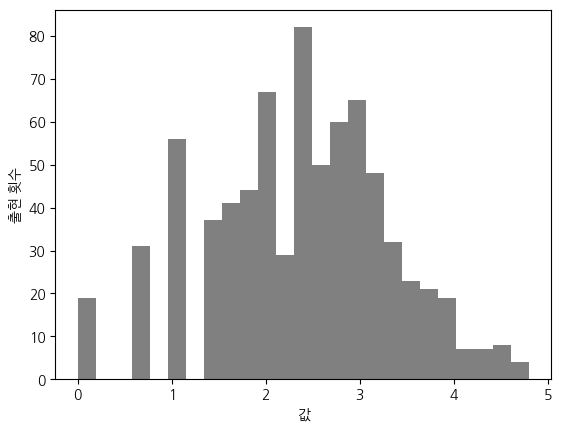

In [69]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")
plt.show() # 책에는 없음

In [70]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


## 4.7 특성 자동 선택
### 4.7.1 일변량 통계

일변량 통계(univariate statistics) 하나의 변수에 대해서만 분석하는 통계 기법- 하나의 특성에 대한 요약 통계량 계산, 분포 이해

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
# f_classif는 분산 분석(ANOVA: Analysis of Variance)을 기반으로 한 F-value를 계산하여 각 특성의 클래스 간 분산 비율을 측정합니다. 일반적으로 분류 문제에서 사용됩니다.
# f_classif가 각 특성을 클래스 간 분산의 크기에 따라 평가하므로, 이 함수에 따라 각 특성의 중요도를 측정하고 중요한 특성들을 선택할 수 있습니다
# f_classif의 계산 결과가 클수록, 해당 특성이 클래스 간에 분산이 크게 나타난다는 것을 의미합니다
# percentile: 이 매개변수는 선택할 특성의 백분율을 지정합니다. 예를 들어 percentile=50으로 설정하면, 가장 높은 점수를 가진 50%의 특성이 선택됩니다.
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


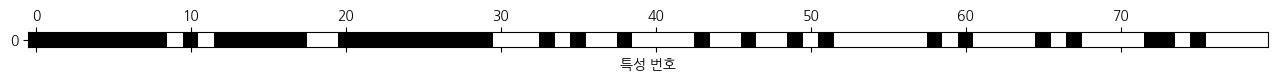

In [72]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

In [73]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


### 4.7.2 모델 기반 특성 선택

 **sklearn의 특성 선택(Feature Selection)**을 수행하기 위해 **SelectFromModel**을 사용하는 예제입니다. 주요 목적은 Random Forest 모델을 기반으로 중요도가 낮은 특성(feature)을 제거하여 중요한 특성만을 선택


SelectFromModel은 머신러닝 모델이 계산한 특성 중요도 또는 계수를 사용하여 불필요한 특성을 제거하는 도구입니다. 이 과정은 다음 단계로 진행됩니다:

모델(여기서는 RandomForestClassifier)을 학습시켜 각 특성의 중요도를 계산.
사용자가 정의한 임계값(threshold)을 기준으로 중요도가 낮은 특성을 제거.

RandomForestClassifier는 앙상블 학습법의 하나인 **랜덤 포레스트(Random Forest)**를 사용한 분류 모델입니다. 랜덤 포레스트는 다수의 결정 트리(Decision Trees)를 생성한 뒤, 각 트리의 예측을 투표 방식으로 결합하여 최종 결과를 제공
랜덤 포레스트와 특성 중요도
랜덤 포레스트는 학습 과정에서 각 특성이 분류 성능에 얼마나 기여했는지를 계산하여 **특성 중요도(feature importance)**를 제공합니다. 이 중요도는 특성 선택에 유용

In [74]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [75]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


reshape(1, -1):
mask를 1D 배열에서 **1행 N열(2D 배열)**로 변환.
여기서 -1은 열의 개수를 자동으로 결정하도록 설정한 것. (배열의 전체 크기가 유지되도록 계산)

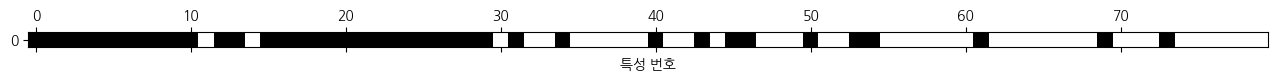

In [76]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
##matshow는 2D 배열만 입력으로 받을 수 있습니다.
##mask는 원래 1D 배열이므로, 이를 (1, 특성 수) 크기의 2D 배열로 변환해야 시각화가 가능.
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

In [77]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


### 4.7.3 반복적 특성 선택

RFE는 특성 선택 기법 중 하나로, 머신러닝 모델의 중요도 기준으로 특성을 하나씩 제거하면서 최적의 특성을 선택합니다.
특징:
1. 먼저 모든 특성을 사용해 모델을 학습.
2. 특성 중요도나 계수를 기준으로 가장 덜 중요한 특성을 제거.
3. 남은 특성으로 반복적으로 학습/제거 과정을 수행.
4. 최종적으로 원하는 개수의 특성만 남김.

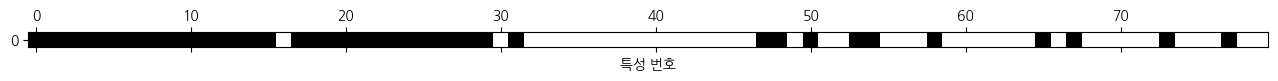

In [78]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])
plt.show() # 책에는 없음

In [79]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


In [80]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


## 4.8 전문가 지식 활용

In [81]:
citibike = mglearn.datasets.load_citibike()

In [82]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3h, Name: one, dtype: int64


문제점: 시간 데이터는 주기성을 가지는데, 숫자만으로는 주기성을 표현할 수 없습니다.

예를 들어, "23시"와 "0시"는 실제로 매우 가까운 시간대(1시간 차이)이지만, 숫자로 보면 23과 0은 큰 차이처럼 보입니다.
이러한 비연속성은 모델이 시간의 자연스러운 순서를 이해하지 못하게 만듭니다.


문제점: 날짜 데이터는 선형적으로 증가하지만, 실제로는 특정한 패턴을 따릅니다.

시간 데이터(예: 연도, 월, 일, 시, 분, 초)를 숫자로 변환하면, 모델은 이를 단순한 선형 관계로 취급합니다.
하지만 시간 데이터는 계절적/주기적 패턴(예: 월별 대여 증가, 출퇴근 시간 등)을 포함하고 있습니다. 이를 숫자로만 표현하면 모델이 패턴을 이해하지 못합니다.

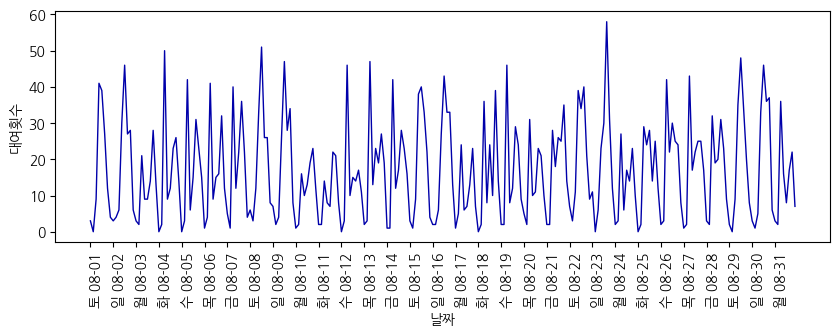

In [83]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")
plt.show() # 책에는 없음

In [84]:
citibike.index[:1]

DatetimeIndex(['2015-08-01 00:00:00'], dtype='datetime64[ns]', name='starttime', freq='3h')

In [85]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# 판다스 1.3.0에서 datetime을 astype()으로 정수로 바꾸는 것이 deprecated되었고 향후 삭제될 예정입니다.
# 대신 view()를 사용합니다.
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.view("int64").reshape(-1, 1) // 10**9

In [86]:
X[:5]

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400]])

In [87]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


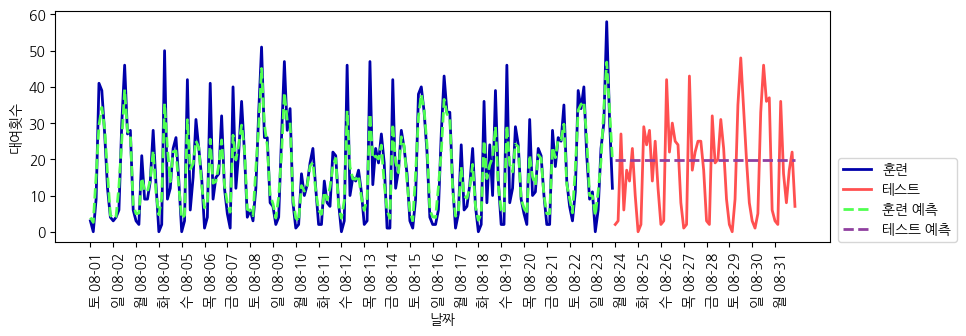

In [88]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

 POSIX 시간은 모델이 시간의 의미를 학습하지 못하게 만듦
문제점:

POSIX 시간은 숫자일 뿐, 날짜, 요일, 시간대와 같은 주기적, 계절적, 또는 특정한 패턴을 담고 있지 않습니다.
예를 들어:
POSIX 시간에서 "월요일 아침"이나 "금요일 저녁" 같은 대여 패턴은 표현되지 않음.
따라서 모델이 시간의 구조적 의미(출퇴근 시간, 주말 효과 등)를 학습하지 못하고, 단순히 큰 숫자로만 인식합니다.

테스트 세트 R^2: 0.60


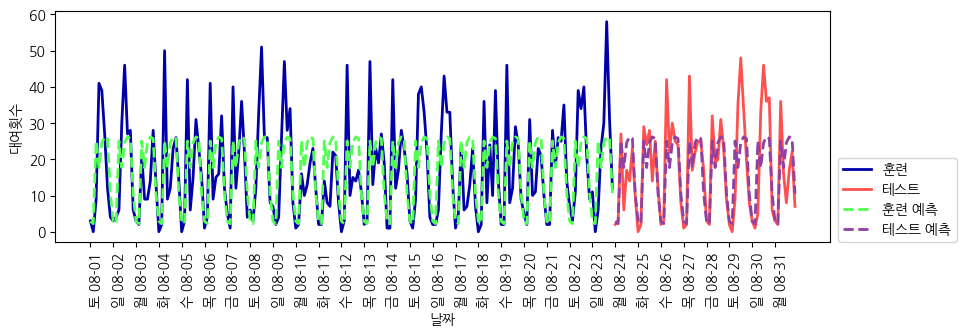

In [89]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

In [90]:
X_hour[:5]

array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12]], dtype=int32)

테스트 세트 R^2: 0.84


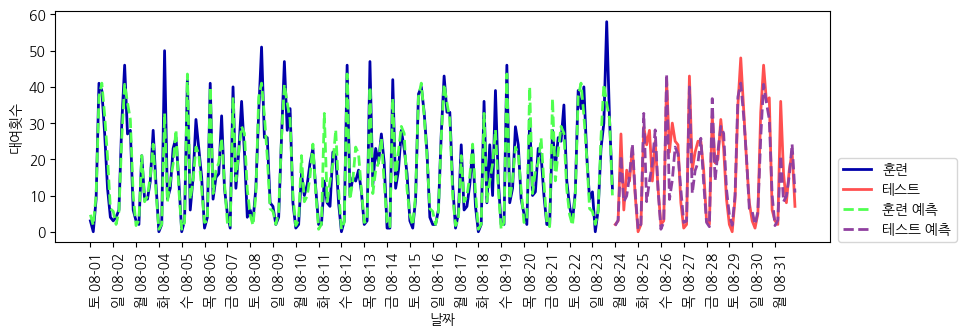

In [91]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

In [92]:
X_hour_week[:5] #[week, 시간]

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12]], dtype=int32)

테스트 세트 R^2: 0.13


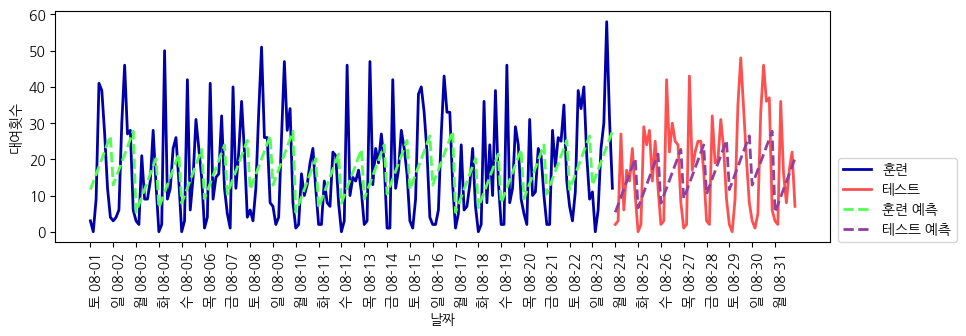

In [93]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

scikit-learn 0.22 버전에서 OneHotEncoder 클래스가 정수 카테고리를 인식하는 방식이 변경됩니다. 이전에는 훈련 데이터에 나타난 0~최댓값 사이 범위를 카테고리로 인식하여 원-핫 인코딩하지만 0.22 버전부터는 고유한 정수 값을 카테고리로 사용합니다. 0.20 버전부터 정수형 데이터를 변환할 때 이와 관련된 경고가 출력됩니다.

In [94]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


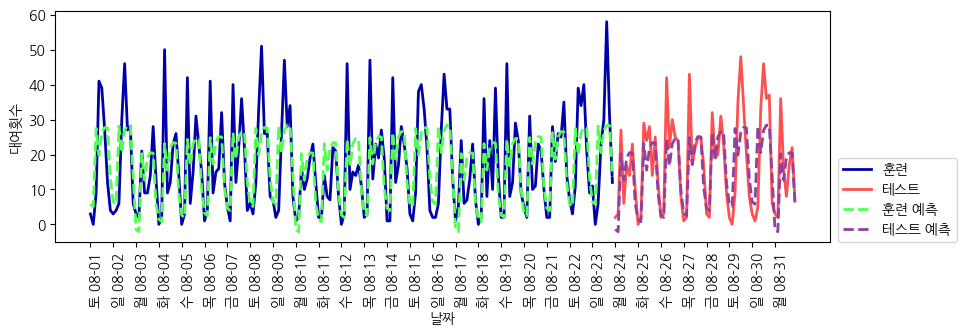

In [95]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


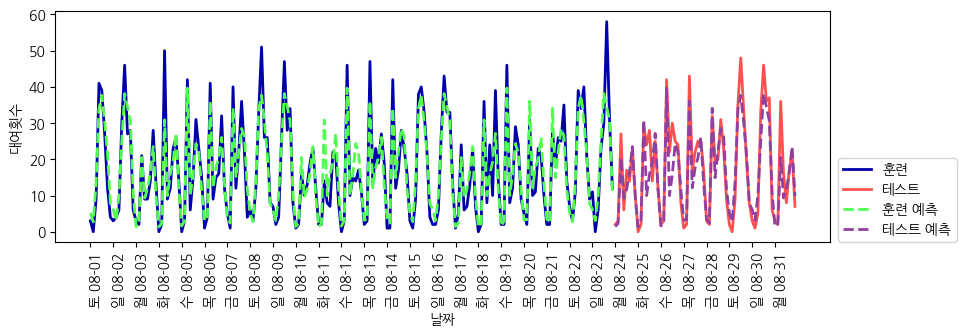

In [96]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [97]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [98]:
# get_feature_names() 메서드가 1.0에서 deprecated 되었고 1.2 버전에서 삭제될 예정입니다.
# 대신 get_feature_names_out()을 사용합니다.
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

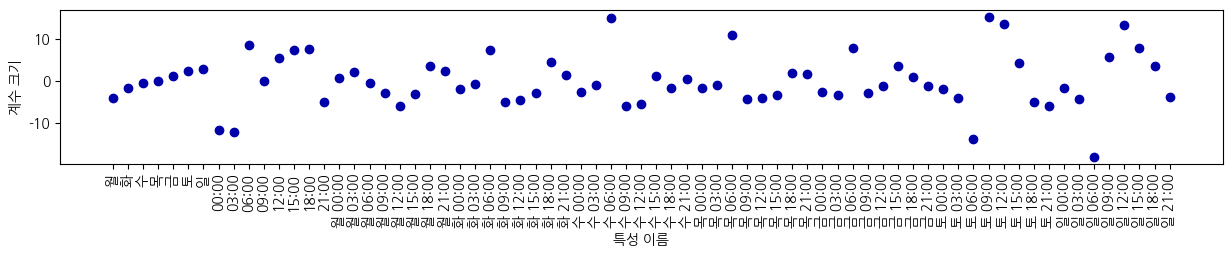

In [99]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")
plt.show() # 책에는 없음

## 4.9 요약 및 정리